In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Lectura del Dataset

In [2]:
path = './World Happiness Report/'
path_data = './Full_Datasets/'

In [3]:
data_csv = os.listdir(path_data)
print(data_csv)

['ds_final.csv', 'full_2015.csv', 'full_2016.csv', 'full_2017.csv', 'full_2018.csv', 'full_2019.csv', 'full_data.csv']


In [4]:
ds = pd.read_csv(path_data+'ds_final.csv')

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       782 non-null    float64
 1   Country                    782 non-null    object 
 2   Happiness Score            782 non-null    float64
 3   GDP per Capita             782 non-null    float64
 4   Life Expectancy            782 non-null    float64
 5   Freedom                    782 non-null    float64
 6   Perceptions of corruption  782 non-null    float64
 7   Generosity                 782 non-null    float64
 8   Region                     782 non-null    object 
dtypes: float64(7), object(2)
memory usage: 55.1+ KB


In [6]:
ds.head()

,Year,Country,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Region
0,2015.0,Switzerland,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,Western Europe
1,2015.0,Iceland,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,Western Europe
2,2015.0,Denmark,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,Western Europe
3,2015.0,Norway,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,Western Europe
4,2015.0,Canada,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,North America


Para el entrenamiento dejaremos fuera la feature 'Country' y 'Year'. Por otro lado crearemos 4 modelos:

- Modelo 1:
    - 'Region' con OHE
    - Variables numericas sin modificar
- Modelo 2:
    - 'Region' con OHE
    - Variables numericas normalizadas
- Modelo 3:
    - Se quita feature 'Region
    - Variables numercias sin modificar
- Modelo 4:
    - Se quita feature 'Region
    - Variables numericas normalizadas

In [7]:
ds.drop(['Country', 'Year'], axis=1, inplace=True)

In [8]:
categoricas = ['Region']
numericas = ['GDP per Capita', 'Life Expectancy','Freedom', 'Perceptions of corruption', 'Generosity']
output =  ['Happiness Score']

In [9]:
ds_2 = ds.drop(['Region'], axis=1, inplace=False)

## Separación en train/test

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**Dataset 1 con:**
- Features:
    - 'Region'
    - 'GDP per Capita'
    - 'Life Expectancy'
    - 'Freedom'
    - 'Perceptions of corruption'
    - 'Generosity'
- Salida:
    - 'Happiness Score'

In [11]:
ds.head()

,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Perceptions of corruption,Generosity,Region
0,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,Western Europe
1,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,Western Europe
2,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,Western Europe
3,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,Western Europe
4,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,North America


In [12]:
features_1 = ['Region', 'GDP per Capita', 'Life Expectancy',
            'Freedom', 'Perceptions of corruption', 'Generosity']

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    ds[features_1], 
    ds[output],  
    test_size=0.3,
    random_state=42)

In [13]:
print(x_train_1.shape)
print(y_train_1.shape)
print(x_test_1.shape)
print(y_test_1.shape)

(547, 6)
(547, 1)
(235, 6)
(235, 1)


In [14]:
y_train_1_norm = (y_train_1 - y_train_1.min(axis=0)) / (y_train_1.max(axis=0) - y_train_1.min(axis=0))
y_test_1_norm = (y_test_1 - y_test_1.min(axis=0)) / (y_test_1.max(axis=0) - y_test_1.min(axis=0))

**Dataset 2 con:**
- Features:
    - 'GDP per Capita'
    - 'Life Expectancy'
    - 'Freedom'
    - 'Perceptions of corruption'
    - 'Generosity'
- Salida:
    - 'Happiness Score'

In [15]:
ds_2.head()

,Happiness Score,GDP per Capita,Life Expectancy,Freedom,Perceptions of corruption,Generosity
0,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,0.90563,0.63297,0.32957,0.45811


In [16]:
features_2 = ['GDP per Capita', 'Life Expectancy', 'Freedom',
              'Perceptions of corruption', 'Generosity']

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    ds[features_2], 
    ds[output],  
    test_size=0.3,
    random_state=42)

print(x_train_2.shape)
print(y_train_2.shape)
print(x_test_2.shape)
print(y_test_2.shape)

(547, 5)
(547, 1)
(235, 5)
(235, 1)


In [17]:
y_train_2_norm = (y_train_2 - y_train_2.min(axis=0)) / (y_train_2.max(axis=0) - y_train_2.min(axis=0))
y_test_2_norm = (y_test_2 - y_test_2.min(axis=0)) / (y_test_2.max(axis=0) - y_test_2.min(axis=0))

## Entrenamiento de modelos

In [18]:
# Entrenamiento de modelos de prueba
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import balanced_accuracy_score

def pipeline_ml_models(preprocessing_pipeline):
  # Modelos a ensayar.
  models = [
      ("RandomForest", 
          Pipeline([
              ('preprocessor', preprocessing_pipeline),
              ('model', RandomForestRegressor(n_estimators=200, random_state=42)) 
          ])
      ),
      
      ("Adaboost", 
          Pipeline([
              ('preprocessor', preprocessing_pipeline),
              ('model', AdaBoostRegressor(n_estimators=200, random_state=42)) 
          ])
      ),
      
      ("LinearRegression", 
          Pipeline([
              ('preprocessor', preprocessing_pipeline),
              ('model', LinearRegression())
          ])
      ),
      
      ("LinearRegression_Ridge", 
          Pipeline([
              ('preprocessor', preprocessing_pipeline),
              ('model', Ridge(alpha = 0.001))
          ])
      ),
      
  ]
  
  return models

### Cadenas de preprocesamiento

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#### Modelo 1: 
- 'Region' con OHE
- Variables numericas sin modificar

In [20]:
preprocessing_pipeline1 = ColumnTransformer(
             transformers=[
                           ('categoric', OneHotEncoder(handle_unknown='ignore'),categoricas)
              ],
              remainder='passthrough'
)

model1 = pipeline_ml_models(preprocessing_pipeline1)

#### Modelo 2:
- 'Region' con OHE
- Variables numericas normalizadas

In [21]:
preprocessing_pipeline2 = ColumnTransformer(
             transformers=[
                           ('categoric', OneHotEncoder(handle_unknown='ignore'),categoricas),
                           #("numerical", StandardScaler(), numericas)
                           ("numerical", MinMaxScaler(), numericas)
              ],
              remainder='passthrough'
)

model2 = pipeline_ml_models(preprocessing_pipeline2)

#### Modelo 3:
- Se quita feature 'Region
- Variables numercias sin modificar

In [22]:
preprocessing_pipeline3 = ColumnTransformer(
    # Transformaciones a aplicar a cada columna
             transformers=[
              ],
              remainder='passthrough'
)

model3 = pipeline_ml_models(preprocessing_pipeline3)

#### Modelo 4:
- Se quita feature 'Region
- Variables numericas normalizadas

In [23]:
preprocessing_pipeline4 = ColumnTransformer(
    # Transformaciones a aplicar a cada columna
             transformers=[
                           #("numerical", StandardScaler(), numericas)
                           ("numerical", MinMaxScaler(), numericas)
              ],
              remainder='passthrough'
)

model4 = pipeline_ml_models(preprocessing_pipeline4)

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.metrics import mean_squared_error

def kfold_pipeline(models_pipeline, samples , target, x_test, y_test, k = 15):
    
    """
    Esta funcion recibe:
        models_pipeline: el pipeline de los modelos a evaluar
        samples: set de entrenamiento
        target: salidas del set de entrenamiento
        x_test: set de testeo
        y_test: set de testeo
        k: el numero de segmentos que utilizara el algoritmo de K-Fold
    """
    results = {}
    for model in models_pipeline:
        model_name = model[0]
        results[model_name] = {}
        
        train_mse = 0
        valid_mse = 0
        
        kf = KFold(n_splits=k)
        kf.get_n_splits(samples)
        
        for train_index, valid_index in kf.split(samples, target):
            x_valid = samples.iloc[valid_index]
            y_valid = target.iloc[valid_index]
            x_train = samples.iloc[train_index]
            y_train = target.iloc[train_index]
            
            model[1].fit(x_train, np.ravel(y_train))
            pred_train = model[1].predict(x_train)
            pred_valid = model[1].predict(x_valid)        
           
            if len(pred_train.shape)>1 and (pred_train.shape[1]>1):
                train_mse = train_mse + mean_squared_error(y_train, pred_train.reshape(-1,1)) / k
                valid_mse = valid_mse + mean_squared_error(y_valid, pred_valid.reshape(-1,1)) / k
            else:
                train_mse = train_mse + mean_squared_error(y_train, pred_train.reshape(-1,1)) / k
                valid_mse = valid_mse + mean_squared_error(y_valid, pred_valid.reshape(-1,1)) / k
        
        pred_test = model[1].predict(x_test)

        results[model_name]["Train"] = train_mse
        results[model_name]["Valid"] = valid_mse
        results[model_name]["Test"] = mean_squared_error(y_test, pred_test.reshape(-1,1))

    models_results = pd.DataFrame(results).T
    return models_results

In [25]:
# Salida sin normalizar
res1 = kfold_pipeline(model1, x_train_1, y_train_1, x_test_1, y_test_1, k = 5)
res2 = kfold_pipeline(model2, x_train_1, y_train_1, x_test_1, y_test_1, k = 5)
res3 = kfold_pipeline(model3, x_train_2, y_train_2, x_test_2, y_test_2, k = 5)
res4 = kfold_pipeline(model4, x_train_2, y_train_2, x_test_2, y_test_2, k = 5)

# Salida normalizada
res5 = kfold_pipeline(model1, x_train_1, y_train_1_norm, x_test_1, y_test_1_norm, k = 5)
res6 = kfold_pipeline(model2, x_train_1, y_train_1_norm, x_test_1, y_test_1_norm, k = 5)
res7 = kfold_pipeline(model3, x_train_2, y_train_2_norm, x_test_2, y_test_2_norm, k = 5)
res8 = kfold_pipeline(model4, x_train_2, y_train_2_norm, x_test_2, y_test_2_norm, k = 5)

In [26]:
resultado1 = pd.DataFrame()
resultado2 = pd.DataFrame()
resultado3 = pd.DataFrame()
resultado4 = pd.DataFrame()
resultado5 = pd.DataFrame()
resultado6 = pd.DataFrame()
resultado7 = pd.DataFrame()
resultado8 = pd.DataFrame()

In [27]:
resultado1['Train Model 1'] = res1['Train']
resultado1['Test Model 1'] = res1['Test']

resultado2['Train Model 2'] = res2['Train']
resultado2['Test Model 2'] = res2['Test']

resultado3['Train Model 3'] = res3['Train']
resultado3['Test Model 3'] = res3['Test']

resultado4['Train Model 4'] = res4['Train']
resultado4['Test Model 4'] = res4['Test']

resultado5['Train Model 5'] = res5['Train']
resultado5['Test Model 5'] = res5['Test']

resultado6['Train Model 6'] = res6['Train']
resultado6['Test Model 6'] = res6['Test']

resultado7['Train Model 7'] = res7['Train']
resultado7['Test Model 7'] = res7['Test']

resultado8['Train Model 8'] = res8['Train']
resultado8['Test Model 8'] = res8['Test']

In [28]:
train_mse = pd.concat([resultado1['Train Model 1'], resultado2['Train Model 2'], resultado3['Train Model 3'],
                      resultado4['Train Model 4'], resultado5['Train Model 5'], resultado6['Train Model 6'], 
                       resultado7['Train Model 7'], resultado8['Train Model 8']], axis = 1)
test_mse = pd.concat([resultado1['Test Model 1'], resultado2['Test Model 2'], resultado3['Test Model 3'],
                      resultado4['Test Model 4'], resultado5['Test Model 5'], resultado6['Test Model 6'],
                      resultado7['Test Model 7'], resultado8['Test Model 8']], axis = 1)

<AxesSubplot:title={'center':'Desempeño de modelos'}>

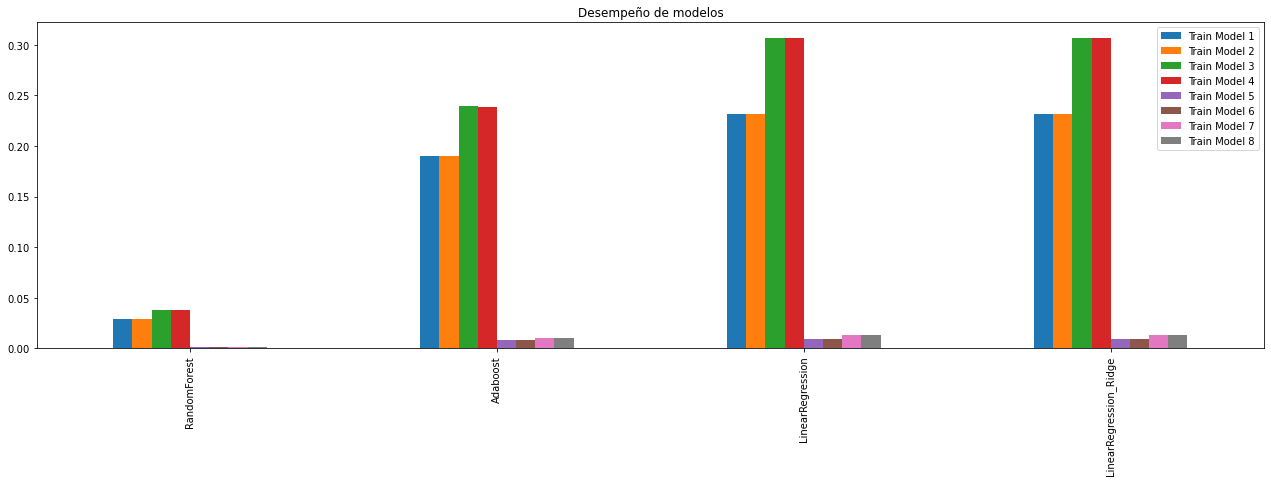

In [29]:
train_mse.plot.bar(title="Desempeño de modelos",figsize=(22,6))

<AxesSubplot:title={'center':'Desempeño de modelos'}>

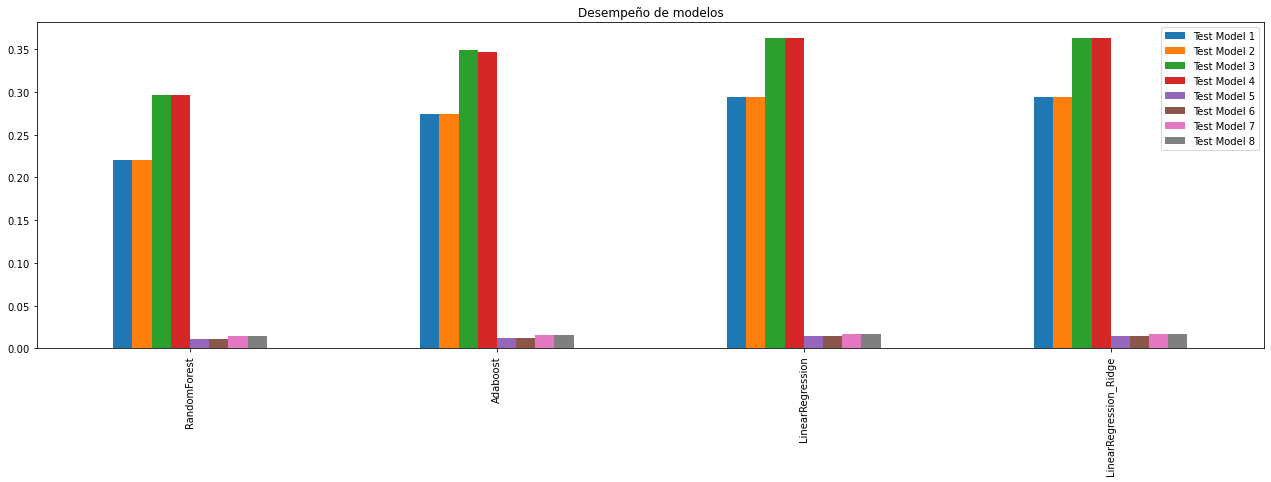

In [30]:
test_mse.plot.bar(title="Desempeño de modelos",figsize=(22,6))

<AxesSubplot:title={'center':'Desempeño de modelos'}>

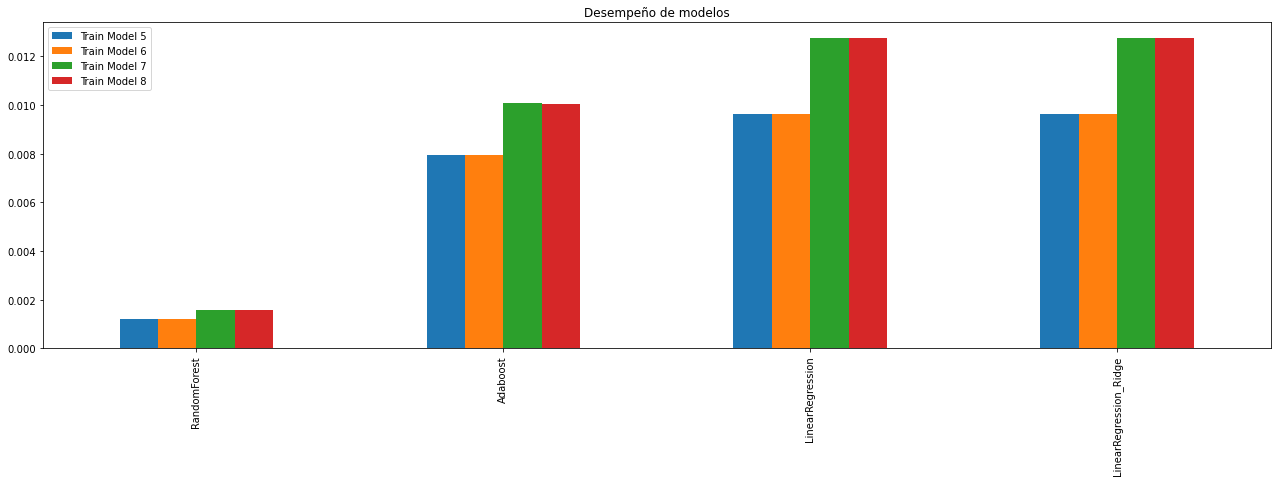

In [31]:
train_mse[['Train Model 5', 'Train Model 6', 'Train Model 7','Train Model 8']].plot.bar(title="Desempeño de modelos",figsize=(22,6))

<AxesSubplot:title={'center':'Desempeño de modelos'}>

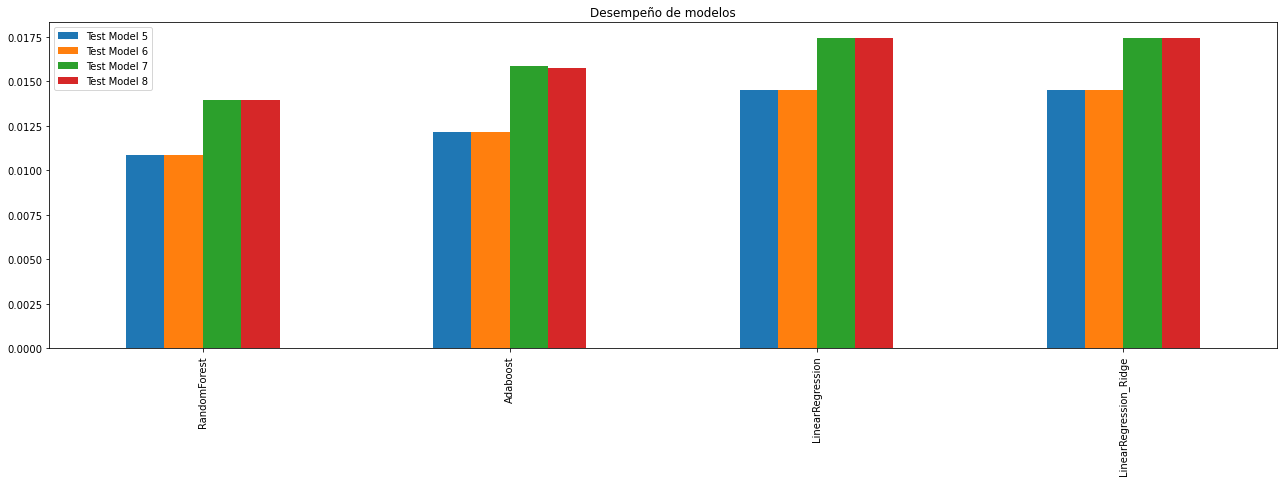

In [32]:
test_mse[['Test Model 5', 'Test Model 6', 'Test Model 7','Test Model 8']].plot.bar(title="Desempeño de modelos",figsize=(22,6))